<span style="color:blue">***ARIAS CLAUDIO DANIEL***</span> comisión: ***19150***


 ## <span style="color:red">CONSIGNA:</span>
 ***Consigna: Leer los set de datos w_data.csv y p_data.csv, fusionarlos a partir de la variable que tengan en común (ID)y realizar las siguientes ejercicios:***

- [X]  **Cuantos ID tienen en común. Nombrar cuales no tienen en común**
- [ ] <span style="color:gray">Corregir los target a solo dos valores distintos** ‘<=50k’ y ‘>50k’
- [ ] <span style="color:gray">Calcular la proporción que hay entre personas con salarios >50k respecto del total para Entre personas de distinto sexo, Raza y Educacion. Por ejemplo cuál es el porcentaje de mujeres con un salario mayor a 50K y compararlo con el de los hombres. Lo mismo para personas de distintas razas y Educación**</span>

***Aspectos a incluir en el entregable:***
El código debe estar hecho en un notebook y debe estar probado. Recordar que si bien, la actividad se realiza grupalmente, las entregas son individuales. 




<div class="alert alert-block alert-info">
     <b> <span style="font-family:Arial">Primer paso</span></b>:<b><span style="font-family:courier new">   
Importo las librerías <b>

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
import decimal
import plotly as pl



In [107]:
df1 = pd.read_csv('p_data.csv',sep=';')

In [108]:
df2 = pd.read_csv('w_data.csv',sep=';')

<div class="alert alert-block alert-danger">
     <b> <span style="font-family:Arial">Nota</span></b>   : 
<b>
<span style="font-family:courier new">   Antes de unir los dataframes, corrijo NAN y los puntos en la columna [' Target ']
</div>

In [109]:
df1

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship
0,39.0,Male,49084,White,United-States,Bachelors,13.0,Never-married,Not-in-family
1,50.0,Male,68553,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
2,38.0,Male,143654,White,United-States,HS-grad,9.0,Divorced,Not-in-family
3,53.0,Male,41510,Black,United-States,11th,7.0,Married-civ-spouse,Husband
4,28.0,Female,195025,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife
...,...,...,...,...,...,...,...,...,...
48837,33.0,Male,597186815,White,United-States,Bachelors,13.0,Never-married,Own-child
48838,39.0,Female,735617153,White,United-States,Bachelors,13.0,Divorced,Not-in-family
48839,64.0,Male,1131807446,Black,United-States,HS-grad,9.0,Widowed,Other-relative
48840,38.0,Male,781422087,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband


In [110]:
df2

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K
...,...,...,...,...,...,...,...
48838,Private,215419.0,0.0,0.0,36.0,735617153,<=50K.
48839,?,321403.0,0.0,0.0,40.0,1131807446,<=50K.
48840,Private,374983.0,0.0,0.0,50.0,781422087,<=50K.
48841,Private,83891.0,5455.0,0.0,40.0,161771296,<=50K.


In [111]:
df2.index

RangeIndex(start=0, stop=48843, step=1)


<div class="alert alert-block alert-info">
     <b> <span style="font-family:Arial">Segundo paso</span></b>: <b>
    
- [X] <b><span style="font-family:courier new">Corregir los target a solo dos valores distintos ‘<=50k’ y ‘>50k’   reemplazamos el "."  por un caracter vacío</b></span>
    
    
  <div class="alert alert-block alert-success">
     <b><span style="font-family:Arial">Nota  </span></b>: <b><span style="font-family:courier new"> vamos a utilizar " str.replace(r'\.',"") " <b> de esta forma, solo reemplazo el punto por espacio vacio y no elimino el resto de los caracteres no numéricos como por ejemplo '>' y '<='</b></span>  <span style="font-family:Arial"</span>  
<div>  
    
    
    

In [112]:
df2['Target'] =df2['Target'].str.replace(r'\.',"")
print(df2)

               Workclass    fnlwgt  Capital Gain  Capital Loss  \
0              State-gov   77516.0        2174.0           0.0   
1       Self-emp-not-inc   83311.0           0.0           0.0   
2                Private  215646.0           0.0           0.0   
3                Private  234721.0           0.0           0.0   
4                Private  338409.0           0.0           0.0   
...                  ...       ...           ...           ...   
48838            Private  215419.0           0.0           0.0   
48839                  ?  321403.0           0.0           0.0   
48840            Private  374983.0           0.0           0.0   
48841            Private   83891.0        5455.0           0.0   
48842       Self-emp-inc  182148.0           0.0           0.0   

       Hours per week          ID  Target  
0                40.0       49084   <=50K  
1                13.0       68553   <=50K  
2                40.0      143654   <=50K  
3                40.0       415

C:\Users\claud\AppData\Local\Temp\ipykernel_20020\911587149.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



me olvide de usar **`REGEX`**

In [130]:
df2

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K
...,...,...,...,...,...,...,...
48838,Private,215419.0,0.0,0.0,36.0,735617153,<=50K
48839,?,321403.0,0.0,0.0,40.0,1131807446,<=50K
48840,Private,374983.0,0.0,0.0,50.0,781422087,<=50K
48841,Private,83891.0,5455.0,0.0,40.0,161771296,<=50K


In [131]:
df2.Target.value_counts()

 <=50K    37155
 >50K     11687
Name: Target, dtype: int64


<div class="alert alert-block alert-info">
     <b> <span style="font-family:Arial">Tercer paso</span></b>: <b>
    
- [X] <b><span style="font-family:courier new">Unimos df1 y df2</b></span>
    
    
  <div class="alert alert-block alert-success">
     <b><span style="font-family:Arial">Nota  </span></b>: <b><span style="font-family:courier new"> vamos a utilizar " pd.merge<b> luego ordeno por la columna ['ID']</b></span>  <span style="font-family:Arial"</span>  
<div>  
    
    
    

In [114]:
df3 =pd.merge(df1,df2,on=['ID']).sort_values('ID').head(20)
df3

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,Target
39866,36.0,Male,3080,White,United-States,Masters,14.0,Married-civ-spouse,Husband,Private,305319.0,0.0,0.0,50.0,>50K
501,62.0,Male,7286,White,United-States,HS-grad,9.0,Married-civ-spouse,Husband,Local-gov,114060.0,0.0,0.0,40.0,<=50K
8,31.0,Female,7496,White,United-States,Masters,14.0,Never-married,Not-in-family,Private,45781.0,14084.0,0.0,50.0,>50K
37823,44.0,Female,9929,White,United-States,HS-grad,9.0,Divorced,Other-relative,Private,103397.0,0.0,0.0,40.0,<=50K
8733,25.0,Female,17968,White,United-States,Masters,14.0,Never-married,Own-child,Private,179953.0,2597.0,0.0,31.0,<=50K
32576,48.0,Male,32311,White,United-States,HS-grad,9.0,Married-civ-spouse,Husband,Private,279724.0,3103.0,0.0,48.0,>50K
33309,41.0,Female,33599,Other,United-States,Prof-school,15.0,Widowed,Not-in-family,State-gov,186990.0,0.0,0.0,52.0,>50K
32682,31.0,Female,36715,White,United-States,Bachelors,13.0,Divorced,Unmarried,Local-gov,198770.0,0.0,0.0,60.0,<=50K
32561,NaN,NaN,37078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,59.0,Male,39500,White,United-States,HS-grad,9.0,Married-civ-spouse,Husband,State-gov,268700.0,0.0,0.0,40.0,<=50K


<div class="alert alert-block alert-success">  
<b><span style="font-family:courier new">Vamos a eliminar esta fila **32561**</b></span>

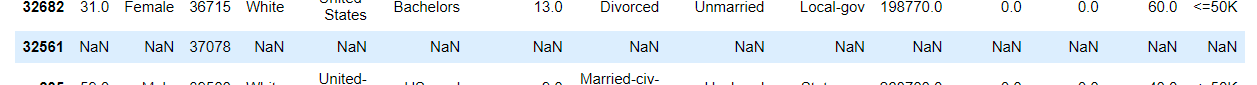

<div class="alert alert-block alert-danger">
     <b> <span style="font-family:Arial">Nota</span></b>: 

    
<b><span style="font-family:courier new">  Si hubieramos reemplazado NaN x Cero, en los calculos tomaría al cero como un campo más para el cálculo y perjudica el informe, por eso procedi a eliminar con el metodo reset_index y eliminamos el index Nº 32561
    utilizando la función<b> <span style="font-family:Arial">Drop </span></b>: 
</div>

In [168]:
df3.drop([32561],inplace=True)
df3

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,Target
39866,36.0,Male,3080,White,United-States,Masters,14.0,Married-civ-spouse,Husband,Private,305319.0,0.0,0.0,50.0,>50K
501,62.0,Male,7286,White,United-States,HS-grad,9.0,Married-civ-spouse,Husband,Local-gov,114060.0,0.0,0.0,40.0,<=50K
8,31.0,Female,7496,White,United-States,Masters,14.0,Never-married,Not-in-family,Private,45781.0,14084.0,0.0,50.0,>50K
37823,44.0,Female,9929,White,United-States,HS-grad,9.0,Divorced,Other-relative,Private,103397.0,0.0,0.0,40.0,<=50K
8733,25.0,Female,17968,White,United-States,Masters,14.0,Never-married,Own-child,Private,179953.0,2597.0,0.0,31.0,<=50K
32576,48.0,Male,32311,White,United-States,HS-grad,9.0,Married-civ-spouse,Husband,Private,279724.0,3103.0,0.0,48.0,>50K
33309,41.0,Female,33599,Other,United-States,Prof-school,15.0,Widowed,Not-in-family,State-gov,186990.0,0.0,0.0,52.0,>50K
32682,31.0,Female,36715,White,United-States,Bachelors,13.0,Divorced,Unmarried,Local-gov,198770.0,0.0,0.0,60.0,<=50K
235,59.0,Male,39500,White,United-States,HS-grad,9.0,Married-civ-spouse,Husband,State-gov,268700.0,0.0,0.0,40.0,<=50K
28,39.0,Male,40290,White,United-States,HS-grad,9.0,Divorced,Not-in-family,Private,367260.0,0.0,0.0,80.0,<=50K


<div class="alert alert-block alert-success">
     <b> <span style="font-family:Arial">Nota</span></b>:<b><span style="font-family:courier new">   chequeo si se reporta duplicados <b>

In [170]:
df3.duplicated()

39866    False
501      False
8        False
37823    False
8733     False
32576    False
33309    False
32682    False
235      False
28       False
3        False
0        False
32574    False
1        False
34       False
34346    False
32564    False
4022     False
33925    False
dtype: bool

In [172]:
df3.isnull().sum()

Age               0
Sex               0
ID                0
Race              0
Country           0
Education         0
Education-Num     0
Marital Status    0
Relationship      0
Workclass         0
fnlwgt            0
Capital Gain      0
Capital Loss      0
Hours per week    0
Target            0
dtype: int64

In [200]:
df3.Target.value_counts()

 <=50K    13
 >50K      6
Name: Target, dtype: int64

In [175]:
df3.rename(columns={'fnlwgt':'salary'})

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship,Workclass,salary,Capital Gain,Capital Loss,Hours per week,Target
39866,36.0,Male,3080,White,United-States,Masters,14.0,Married-civ-spouse,Husband,Private,305319.0,0.0,0.0,50.0,>50K
501,62.0,Male,7286,White,United-States,HS-grad,9.0,Married-civ-spouse,Husband,Local-gov,114060.0,0.0,0.0,40.0,<=50K
8,31.0,Female,7496,White,United-States,Masters,14.0,Never-married,Not-in-family,Private,45781.0,14084.0,0.0,50.0,>50K
37823,44.0,Female,9929,White,United-States,HS-grad,9.0,Divorced,Other-relative,Private,103397.0,0.0,0.0,40.0,<=50K
8733,25.0,Female,17968,White,United-States,Masters,14.0,Never-married,Own-child,Private,179953.0,2597.0,0.0,31.0,<=50K
32576,48.0,Male,32311,White,United-States,HS-grad,9.0,Married-civ-spouse,Husband,Private,279724.0,3103.0,0.0,48.0,>50K
33309,41.0,Female,33599,Other,United-States,Prof-school,15.0,Widowed,Not-in-family,State-gov,186990.0,0.0,0.0,52.0,>50K
32682,31.0,Female,36715,White,United-States,Bachelors,13.0,Divorced,Unmarried,Local-gov,198770.0,0.0,0.0,60.0,<=50K
235,59.0,Male,39500,White,United-States,HS-grad,9.0,Married-civ-spouse,Husband,State-gov,268700.0,0.0,0.0,40.0,<=50K
28,39.0,Male,40290,White,United-States,HS-grad,9.0,Divorced,Not-in-family,Private,367260.0,0.0,0.0,80.0,<=50K


<div class="alert alert-block alert-success">
     <b><span style="font-family:Arial">Nota</span></b>:<b><span style="font-family:courier new"> Agrupamos con <b>pd.pivot_table las columnas ['Target'],['Sex'],['Race'],['Education'] y totalizamos con 'sum'</b></span>  <span style="font-family:Arial"</span>  
<div>

In [199]:
pivot1 = pd.pivot_table(df3, index=['Target','Sex','Race','Education'], values='fnlwgt',aggfunc='sum')
pivot1

fnlwgt
Target Sex     Race   Education              
 <=50K  Female  White  Assoc-voc     163303.0
                       Bachelors     198770.0
                       HS-grad       185488.0
                       Masters       179953.0
        Male    Black  11th          234721.0
                       Some-college  311512.0
                White  9th           258126.0
                       Bachelors     160827.0
                       HS-grad       750020.0
 >50K   Female  Other  Prof-school   186990.0
                White  Masters        45781.0
        Male    White  Assoc-acdm    336951.0
                       Bachelors     168212.0
                       HS-grad       279724.0
                       Masters       305319.0

<div class="alert alert-block alert-info">
  <b><span style="font-family:Arial">Cuarto Paso</span></b>:     
    
    
<b> <b><span style="font-family:courier new">Calculos de proporción en personas </b> 
<div>

- [X] <span style="color:black">Calcular la proporción que hay entre personas con salarios >50k respecto del total para Entre personas de distinto sexo, Raza y Educacion. Por ejemplo cuál es el porcentaje de mujeres con un salario mayor a 50K y compararlo con el de los hombres. Lo mismo para personas de distintas razas y Educación**</span>



<div class="alert alert-block alert-success">
     <b><span style="font-family:Arial">Nota</span></b>:<b><span style="font-family:courier new"> Agrupamos con <b>pd.pivot_table con las columnas ['Target'], y ['Sex']</b></span>  <span style="font-family:Arial"</span>  
<div>

In [183]:
pivot2 = pd.pivot_table(df3, index='Sex', columns='Target', values='fnlwgt')
pivot2

Target,<=50K,>50K
Sex,,
Female,145502.80,116385.5
Male,214400.75,272551.5


<div class="alert alert-block alert-success">
     <b><span style="font-family:Arial">Nota</span></b>:<b><span style="font-family:courier new"> Agrupamos con <b>pd.pivot_table</b></span> <span style="font-family:Arial"</span>  
<div>

In [184]:
pd.pivot_table(df3,
               index=['Sex'],
               columns = ['Target'],
               values = ['fnlwgt'],
               aggfunc = (len))/df.shape[0]*100
               

fnlwgt          
Target      <=50K      >50K
Sex                        
 Female  2.049180  0.819672
 Male    3.278689  1.639344

<div class="alert alert-block alert-success">
     <b><span style="font-family:Arial">Nota</span></b>:<b><span style="font-family:courier new"> Agrupamos con <b>pd.pivot_table con las columnas ['Target'], ['Education'] y ['Race']</b></span>  <span style="font-family:Arial"</span>  
<div>

In [185]:
pivot3 = pd.pivot_table(df3,
                        index=['Target','Education','Race'],
                        columns=['Sex'], 
                        values='fnlwgt',
                        aggfunc='count')
pivot3.round(2)

Sex                           Female   Male
Target Education     Race                  
 <=50K  11th          Black      NaN    1.0
        9th           White      NaN    1.0
        Assoc-voc     White      1.0    NaN
        Bachelors     White      1.0    2.0
        HS-grad       White      2.0    3.0
        Masters       White      1.0    NaN
        Some-college  Black      NaN    1.0
 >50K   Assoc-acdm    White      NaN    1.0
        Bachelors     White      NaN    1.0
        HS-grad       White      NaN    1.0
        Masters       White      1.0    1.0
        Prof-school   Other      1.0    NaN

In [186]:
df3.Sex.value_counts(normalize=True)*100

 Male      63.157895
 Female    36.842105
Name: Sex, dtype: float64

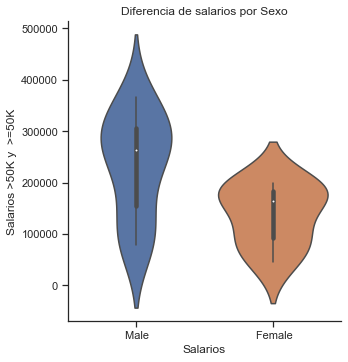

In [90]:
ax = sns.catplot(data=df3, kind='violin', y='fnlwgt', x='Sex', split=True)
ax.set(xlabel='Salarios', ylabel='Salarios >50K y  >=50K', title='Diferencia de salarios por Sexo')#

In [187]:
df3.Education.value_counts(normalize=True)*100

 HS-grad         31.578947
 Bachelors       21.052632
 Masters         15.789474
 Prof-school      5.263158
 11th             5.263158
 Some-college     5.263158
 9th              5.263158
 Assoc-acdm       5.263158
 Assoc-voc        5.263158
Name: Education, dtype: float64